# Matplotlib: Cars Dataset

In this notebook you will visualize the cars dataset using Matplotlib.

## Imports

In [1]:
import numpy as np
import pandas as pd
from altair import load_dataset

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

## Dataset

In [3]:
cars = load_dataset('cars')

In [4]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Scatterplot of displacement versus acceleration 

Use Matplotlib to create a scatterplot of displacement (y) versus acceleration versus (x):

* Use an alpha of 0.5
* Use the `data` keyword argument of Matplotlib to pass in the data.
* Label the x- and y- axes and plot title.
* Use x and y gridlines.

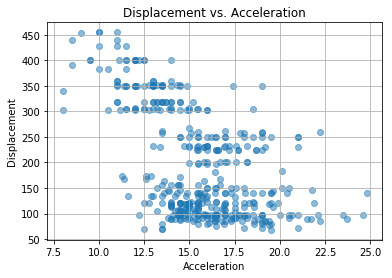

In [5]:
plt.scatter("Acceleration", "Displacement", alpha = 0.5, data = cars)
plt.xlabel("Acceleration")
plt.ylabel("Displacement")
plt.grid(axis = 'both')
plt.title("Displacement vs. Acceleration")
plt.show()

# Average horsepower by year

Create a new `DataFrame`, named `hp_year`, with two columns:

* The year of the date only (`YearOnly`).
* The average horsepower for each year.

In [6]:
hp_year = pd.DataFrame()
temp = cars.copy()
temp['Year2'] = pd.to_numeric(cars['Year'].str.split('-').str.get(0))
temp1 = pd.DataFrame(list(temp.groupby('Year2').groups.keys()), columns = ['YearOnly'])
temp2 = pd.DataFrame(temp.groupby('Year2')['Horsepower'].mean(), columns = ['Horsepower'])
hp_year = pd.merge(temp1, temp2, left_on = 'YearOnly', right_index = True, how = 'outer')

In [7]:
hp_year

,YearOnly,Horsepower
0,1970,148.857143
1,1971,104.928571
2,1972,120.178571
3,1973,130.475000
4,1974,94.230769
5,1975,101.066667
6,1976,101.117647
7,1977,105.071429
8,1978,99.694444
9,1979,101.206897


In [8]:
assert list(hp_year.columns)==['YearOnly', 'Horsepower']
assert list(hp_year.YearOnly.unique())==[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1982]
assert len(hp_year)==12

Use Matplotlib to create a line chart of average horsepower (y) versus year (x):

* Put both lines and points on your chart.
* Use the `data` keyword argument.
* Label the x- and y- axes and plot title.
* Use x and y axes gridlines.

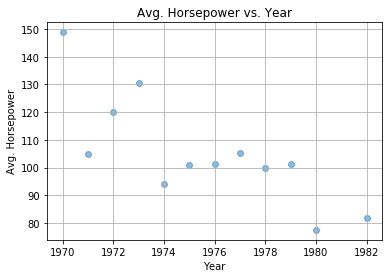

In [9]:
plt.scatter("YearOnly", "Horsepower", alpha = 0.5, data = hp_year)
plt.xlabel("Year")
plt.ylabel("Avg. Horsepower")
plt.grid(axis = 'both')
plt.title("Avg. Horsepower vs. Year")
plt.show()

## Displacement histogram

Use Matplotlib to create a histogram of the displacement:

* Use the `data` keyword argument.
* Set the number of bins appropriately.
Label the x- and y- axes and plot title.
* Use y axes gridlines.

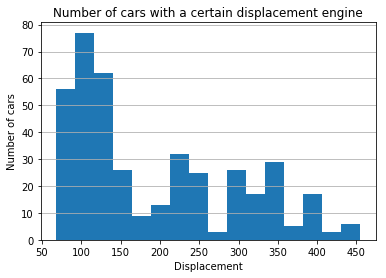

In [10]:
plt.hist("Displacement", data = cars, bins = 16)
plt.ylabel("Number of cars")
plt.xlabel("Displacement")
plt.grid(axis = 'y')
plt.title("Number of cars with a certain displacement engine")
plt.show()